In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd
import os

Code di atas adalah contoh penggunaan beberapa pustaka populer dalam pemrosesan data dan visualisasi di Python. Pertama, `matplotlib.pyplot` digunakan untuk membuat plot/grafik. `numpy` (diimpor sebagai `np`) adalah pustaka untuk komputasi numerik, sering digunakan dalam operasi matematika dan array. `cv2` (diimpor sebagai `cv`) adalah OpenCV, digunakan untuk pengolahan citra. `pandas` diimpor sebagai `pd` dan digunakan untuk manipulasi dan analisis data terstruktur, seperti DataFrame. Terakhir, `os` digunakan untuk interaksi dengan sistem operasi, seperti mengelola direktori file.

## Data Loading

In [2]:
def ImportImage(folder):
    images = []
    filenames = []
    datalabel = []

    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            datalabel.append(label)
            i = 0
            for filename in os.listdir(label_path):
                file_path = os.path.join(label_path, filename)
                img = cv.imread(file_path)
                if img is not None:
                    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                    img_resized = cv.resize(img_gray, (300, 300))
                    images.append(img_resized)
                    filenames.append(filename)
                    i += 1
                    print(f"Processed {filename} in label {label}")

    return images, filenames, datalabel

Code di atas merupakan sebuah fungsi, yaitu `ImportImage` yang digunakan untuk mengimpor gambar-gambar dari direktori yang ditentukan. Di dalam fungsi, dilakukan iterasi pada setiap sub-direktori di dalam direktori yang diberikan. Setiap gambar yang ditemukan di dalam sub-direktori tersebut dibaca, dikonversi menjadi citra skala keabuan, dan diubah ukurannya menjadi 300x300 piksel. Gambar-gambar yang telah diproses beserta dengan nama file dan labelnya dikumpulkan dalam list yang sesuai. Selama proses, pesan yang mencetak status pemrosesan setiap gambar ditampilkan. Hasil akhir dari fungsi ini adalah array gambar, list nama file, dan list label dari gambar-gambar yang telah diimpor.

In [3]:
images, filenames, labels = ImportImage("../dataset/all")

print("Filenames:", filenames[:5])
print("Labels:", labels)

Processed 01_F1D022016_1_3.jpg in label finger1
Processed 01_F1D022044_1_1.jpg in label finger1
Processed 01_F1D022044_1_2.jpg in label finger1
Processed 01_F1D022044_1_3.jpg in label finger1
Processed 01_F1D022069_1_1.jpg in label finger1
Processed 01_F1D022069_1_2.jpg in label finger1
Processed 01_F1D022069_1_3.jpg in label finger1
Processed 01_f1d022103_1_1.jpg in label finger1
Processed 01_f1d022103_1_2.jpg in label finger1
Processed 01_f1d022103_1_3.jpg in label finger1
Processed 01_f1d022120_1_1.jpg in label finger1
Processed 01_f1d022120_1_2.jpg in label finger1
Processed 01_f1d022120_1_3.jpg in label finger1
Processed 01_f1d022149_1_1.jpg in label finger1
Processed 01_f1d022149_1_2.jpg in label finger1
Processed 01_F1D022016_2_3.jpg in label finger2
Processed 01_F1D022044_2_1.jpg in label finger2
Processed 01_F1D022044_2_2.jpg in label finger2
Processed 01_F1D022044_2_3.jpg in label finger2
Processed 01_F1D022069_2_1.jpg in label finger2
Processed 01_F1D022069_2_2.jpg in label 

Code di atas menggunakan fungsi `ImportImage` untuk mengimpor gambar-gambar dari direktori `'../dataset/sample'`. Hasil dari pemrosesan tersebut disimpan dalam variabel `images`, `filenames`, dan `labels`, yang masing-masing berisi array gambar, list nama file, dan list label dari gambar-gambar yang telah diimpor. Selanjutnya, dilakukan pencetakan lima nama file pertama dari list `filenames` dan list label keseluruhan, untuk memberikan gambaran singkat tentang gambar-gambar yang telah diimpor dan labelnya.

## Data Preparation

### Data Augmentation

In [4]:
def rotasi(image, sudut):
    tinggi, lebar = image.shape
    center = (lebar / 2, tinggi / 2)
    rot_matrix = cv.getRotationMatrix2D(center, sudut, 1.0)
    hasilrotasi = cv.warpAffine(image, rot_matrix, (lebar, tinggi))
    return hasilrotasi

Code di atas menggunakan fungsi `rotasi` yang digunakan untuk melakukan rotasi pada gambar grayscale (`image`) sebesar sudut tertentu (`sudut`). Di dalam fungsi, terlebih dahulu dihitung pusat rotasi gambar dan matriks rotasi menggunakan `cv.getRotationMatrix2D`. Selanjutnya, gambar dirotasi menggunakan `cv.warpAffine` dengan menggunakan matriks rotasi yang telah dihasilkan, serta ukuran gambar yang sama dengan ukuran gambar asli. Hasil dari proses rotasi tersebut kemudian dikembalikan sebagai gambar yang telah dirotasi.

In [5]:
sudut_rotasi = [0, 90, 90, 135]
hasil_0 = []
hasil_90 = []
hasil_90 = []
hasil_135 = []

for img in images:
    hasil_0.append(rotasi(img, 0))
    hasil_45.append(rotasi(img, 45))
    hasil_90.append(rotasi(img, 90))
    hasil_135.append(rotasi(img, 135))

print(len(hasil_0))
print(len(hasil_45))
print(len(hasil_90))
print(len(hasil_135))

75
75
75
75


Code di atas melakukan rotasi gambar-gambar yang telah diimpor dengan sudut rotasi tertentu, yaitu 0°, 45°, 90°, dan 135°. Hasil rotasi untuk setiap sudut disimpan dalam empat list terpisah, yaitu `hasil_0`, `hasil_45`, `hasil_90`, dan `hasil_135`. Proses rotasi dilakukan menggunakan fungsi `rotasi`, yang diterapkan pada setiap gambar dalam array `images` dengan sudut rotasi yang sesuai. Setelah proses rotasi selesai, dilakukan pencetakan panjang (jumlah elemen) dari masing-masing list hasil rotasi untuk memverifikasi jumlah gambar yang telah dirotasi.

### Preprocessing

#### Preprocessing 1

In [6]:
def contrast(image):
    intensity = np.mean(image)
    return np.sum((image - intensity) ** 2)

def dissimilarity(image):
    height, width = image.shape
    dissimilarity = 0
    for i in range(height):
        for j in range(width):
            dissimilarity += image[i, j] * abs(i - j)
    return dissimilarity

def Homogenitas(image):
    height, width = image.shape
    homogenitas = 0
    for i in range(height):
        for j in range(width):
            homogenitas += image[i, j] / (1.0 + abs(i - j))
    return homogenitas

def Entropi(image):
    height, width = image.shape
    entropi = 0
    for i in range(height):
        for j in range(width):
            if image[i, j] != 0:
                entropi -= image[i, j] * np.log2(image[i, j])
    return entropi

Code di atas mendefinisikan empat fungsi untuk menghitung fitur tekstur dari sebuah gambar grayscale. Pertama, fungsi `contrast` menghitung kontras gambar dengan mengukur seberapa jauh intensitas setiap piksel dari rata-rata intensitas gambar secara keseluruhan. Fungsi `dissimilarity` menghitung dissimilarity dengan mengukur perbedaan intensitas antara setiap pasangan piksel dalam gambar. Selanjutnya, fungsi `Homogenitas` mengukur seberapa seragam distribusi intensitas piksel dalam gambar. Terakhir, fungsi `Entropi` mengukur tingkat ketidakpastian distribusi intensitas piksel dalam gambar.

#### Preprocessing 2

In [7]:
def ASM(image):
    return np.sum(image ** 2)

def Energi(image):
    return np.sum(image ** 2)
def Correlation(image):
    mean_x = np.mean(image)
    std_x = np.std(image)

    image_transpose = np.transpose(image)
    mean_y = np.mean(image_transpose)
    std_y = np.std(image_transpose)

    if std_x == 0 or std_y == 0:
        return 0
    else:
        return np.sum((image - mean_x) * (image_transpose - mean_y)) / (image.size * std_x * std_y)

Code di atas mendefinisikan tiga fungsi tambahan untuk menghitung fitur tekstur dari sebuah gambar grayscale. Fungsi `ASM` (Angular Second Moment) mengukur seberapa seragam distribusi intensitas piksel dalam gambar dengan menghitung jumlah kuadrat intensitas piksel. Fungsi `Energi` mirip dengan `ASM`, di mana ia juga mengukur seberapa seragam distribusi intensitas piksel dengan menghitung jumlah kuadrat intensitas piksel, tetapi keduanya sebenarnya memiliki implementasi yang sama. Terakhir, fungsi `Correlation` mengukur tingkat korelasi antara intensitas piksel dalam gambar dan intensitas piksel dalam gambar yang telah di-transpose, memberikan informasi tentang hubungan linier antara intensitas piksel di berbagai arah.

#### Preprocessing 3

In [8]:
headerPass = ['path', 'Kontras0', 'Dissimilarity0', 'Homogenitas0', 'Entropi0', 'ASM0', 'Energy0', 'Correlation0']

def save_frame(result):
    frame = []
    for idx, img in enumerate(result):
        save = [filenames[idx]]
        save.append(contrast(img))
        save.append(dissimilarity(img))
        save.append(Homogenitas(img))
        save.append(Entropi(img))
        save.append(ASM(img))
        save.append(Energi(img))
        save.append(Correlation(img))
        frame.append(save)
    return frame

Code di atas mendefinisikan fungsi `save_frame` yang digunakan untuk menyimpan hasil ekstraksi fitur tekstur dari gambar-gambar ke dalam sebuah frame data. Frame data tersebut terdiri dari sejumlah fitur yang dihitung untuk setiap gambar, seperti kontras, dissimilarity, homogenitas, entropi, ASM, energi, dan korelasi, serta informasi path file dari gambar tersebut. Fungsi ini mengiterasi melalui hasil ekstraksi fitur untuk setiap gambar dalam `result`, dan menyimpan nilai-nilai fitur tersebut bersama dengan path file dalam list `frame`. List tersebut kemudian akan digunakan untuk pembuatan DataFrame dalam langkah selanjutnya.

#### Preprocessing 4

Code di bawah menghasilkan visualisasi lima gambar teratas berdasarkan nilai korelasi terbesar (`Correlation0`) dari hasil ekstraksi fitur untuk gambar-gambar yang telah dirotasi sebesar 0°. Pertama, hasil ekstraksi fitur disimpan dalam DataFrame `df_0` dengan kolom-kolom yang sesuai. DataFrame tersebut kemudian diurutkan berdasarkan nilai `Correlation0` secara menurun. Selanjutnya, lima gambar teratas beserta dengan nilai `Correlation0`-nya ditampilkan dalam sebuah subplot. Setiap gambar ditampilkan dengan judul yang menampilkan nilai `Correlation0` yang bersesuaian, memberikan gambaran visual tentang gambar-gambar dengan korelasi tertinggi.

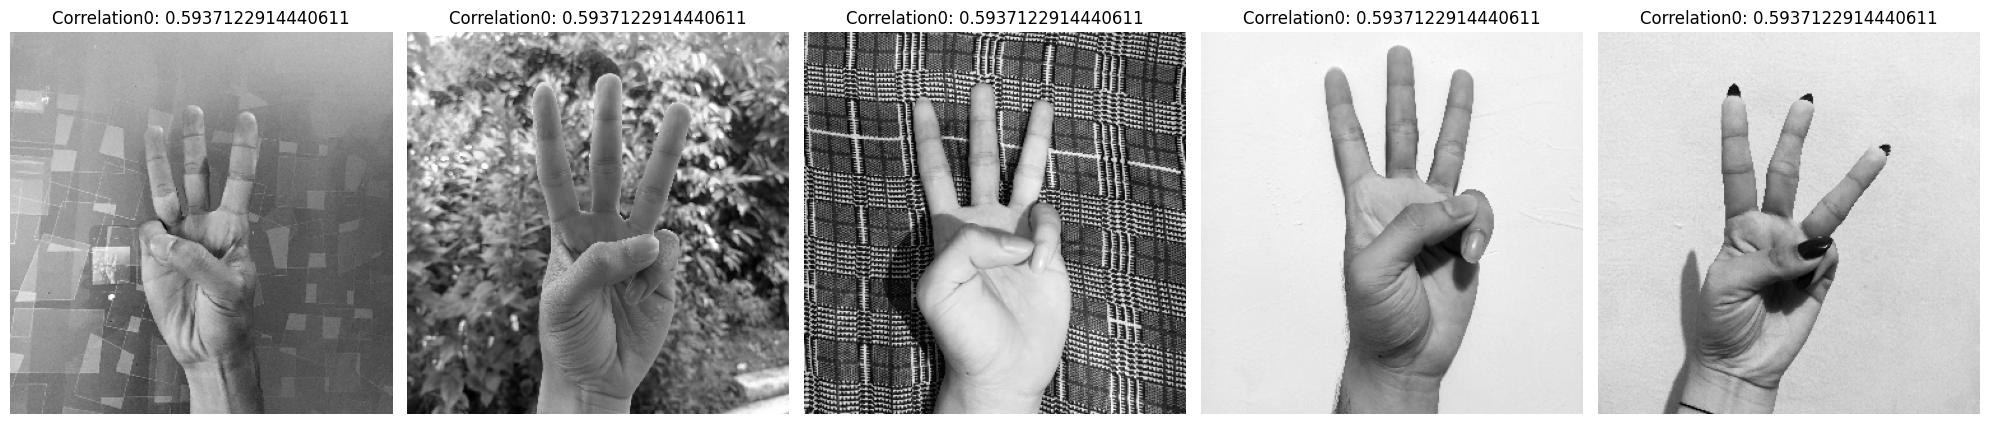

In [9]:
frame_0 = save_frame(hasil_0)
df_0 = pd.DataFrame(frame_0, columns=headerPass)

df_sorted_0 = df_0.sort_values(by=['Correlation0'], ascending=False)
top_5_results_0 = df_sorted_0[['path', 'Correlation0']].head(1)

for index, row in top_5_results_0.iterrows():
    filename = row['path']
    correlation0 = row['Correlation0']
    image_index = filenames.index(filename)
    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(hasil_0[image_index + i], cmap='gray') 
        plt.title(f"Correlation0: {correlation0}")
        plt.axis('off')
plt.tight_layout()
plt.show()

### Feature Extraction

In [10]:
def contrast(image):
    intensity = np.mean(image)
    return np.sum((image - intensity) ** 2)

Code di atas mendefinisikan fungsi `contrast` yang menghitung kontras dari sebuah gambar grayscale. Dalam perhitungannya, terlebih dahulu dihitung rata-rata intensitas piksel (`intensity`) dalam gambar, kemudian kontras diukur dengan menghitung jumlah kuadrat perbedaan antara intensitas setiap piksel dengan rata-rata intensitas gambar secara keseluruhan. Hasil dari operasi ini memberikan informasi tentang variasi intensitas piksel di dalam gambar.

In [11]:
def dissimilarity(image):
    height, width = image.shape
    dissimilarity = 0
    for i in range(height):
        for j in range(width):
            dissimilarity += image[i, j] * abs(i - j)
    return dissimilarity

Code di atas mendefinisikan fungsi `dissimilarity` yang menghitung dissimilarity dari sebuah gambar grayscale. Dalam perhitungannya, nilai dissimilarity diukur dengan mengakumulasikan produk dari intensitas piksel dan perbedaan indeks baris dan kolom dari setiap pasangan piksel dalam gambar. Hasil dari operasi ini memberikan informasi tentang seberapa besar perbedaan intensitas antara piksel-piksel di dalam gambar.

In [12]:
def Homogenitas(image):
    height, width = image.shape
    homogenitas = 0
    for i in range(height):
        for j in range(width):
            homogenitas += image[i, j] / (1.0 + abs(i - j))
    return homogenitas

Code di atas mendefinisikan fungsi `Homogenitas` yang menghitung homogenitas dari sebuah gambar grayscale. Dalam perhitungannya, homogenitas diukur dengan mengakumulasikan nilai intensitas piksel yang dibagi dengan satu ditambah nilai absolut dari perbedaan indeks baris dan kolom dari setiap piksel. Hasil dari operasi ini memberikan informasi tentang seberapa seragam distribusi intensitas piksel di dalam gambar.

In [13]:
def Entropi(image):
    height, width = image.shape
    entropi = 0
    for i in range(height):
        for j in range(width):
            if image[i, j] != 0:
                entropi -= image[i, j] * np.log2(image[i, j])
    return entropi

Code di atas mendefinisikan fungsi `Entropi` yang menghitung entropi dari sebuah gambar grayscale. Dalam perhitungannya, entropi diukur dengan mengakumulasikan nilai-nilai minus dari hasil perkalian antara intensitas piksel yang bukan nol dengan logaritma basis 2 dari intensitas piksel tersebut. Hasil dari operasi ini memberikan informasi tentang tingkat ketidakpastian distribusi intensitas piksel di dalam gambar.

In [14]:
def ASM(image):
    return np.sum(image ** 2)

Code di atas mendefinisikan fungsi `ASM` (Angular Second Moment) yang menghitung nilai ASM dari sebuah gambar grayscale. Dalam perhitungannya, ASM diukur dengan mengakumulasikan kuadrat dari intensitas piksel di seluruh piksel dalam gambar. Hasil dari operasi ini memberikan informasi tentang seberapa seragam distribusi intensitas piksel di dalam gambar.

In [15]:
def Energi(image):
    return np.sum(image ** 2)

Code di atas mendefinisikan fungsi `Energi` yang menghitung nilai energi dari sebuah gambar grayscale. Dalam perhitungannya, energi diukur dengan mengakumulasikan kuadrat dari intensitas piksel di seluruh piksel dalam gambar, mirip dengan perhitungan Angular Second Moment (ASM). Hasil dari operasi ini memberikan informasi tentang seberapa seragam distribusi intensitas piksel di dalam gambar.

In [16]:
def Correlation(image):
    mean_x = np.mean(image)
    std_x = np.std(image)

    image_transpose = np.transpose(image)
    mean_y = np.mean(image_transpose)
    std_y = np.std(image_transpose)

    if std_x == 0 or std_y == 0:
        return 0
    else:
        return np.sum((image - mean_x) * (image_transpose - mean_y)) / (image.size * std_x * std_y)

Code di atas mendefinisikan fungsi `Correlation` yang menghitung nilai korelasi antara intensitas piksel dalam sebuah gambar grayscale dan intensitas piksel dalam gambar yang telah di-transpose. Dalam perhitungannya, nilai rata-rata dan standar deviasi dari intensitas piksel dihitung untuk gambar asli dan gambar transpose. Jika salah satu standar deviasi adalah nol, fungsi mengembalikan nilai nol untuk menghindari pembagian oleh nol. Jika tidak, korelasi diukur dengan menghitung jumlah dari produk antara perbedaan intensitas piksel dengan rata-rata dan standar deviasi dari kedua gambar, dibagi oleh jumlah piksel dan produk standar deviasi keduanya. Hasil dari operasi ini memberikan informasi tentang hubungan linier antara intensitas piksel di berbagai arah.

In [17]:
headerPass = ['path', 'Kontras0', 'Dissimilarity0', 'Homogenitas0', 'Entropi0', 'ASM0', 'Energy0', 'Correlation0']

def save_frame(result):
    frame = []
    for idx, img in enumerate(result):
        save = [filenames[idx]]
        save.append(contrast(img))
        save.append(dissimilarity(img))
        save.append(Homogenitas(img))
        save.append(Entropi(img))
        save.append(ASM(img))
        save.append(Energi(img))
        save.append(Correlation(img))
        frame.append(save)
    return frame

Code di atas mendefinisikan fungsi `save_frame` yang digunakan untuk menyimpan hasil ekstraksi fitur tekstur dari gambar-gambar ke dalam sebuah frame data. Frame data tersebut terdiri dari nilai-nilai fitur yang dihitung untuk setiap gambar, seperti kontras, dissimilarity, homogenitas, entropi, ASM, energi, dan korelasi, serta informasi path file dari gambar tersebut. Fungsi ini mengiterasi melalui hasil ekstraksi fitur untuk setiap gambar dalam `result`, dan menyimpan nilai-nilai fitur tersebut bersama dengan path file dalam list `frame`. List tersebut kemudian akan digunakan untuk pembuatan DataFrame dalam langkah selanjutnya.

Code di bawah menghasilkan visualisasi lima gambar teratas berdasarkan nilai korelasi terbesar (`Correlation0`) dari hasil ekstraksi fitur untuk gambar-gambar yang telah dirotasi sebesar 0°. Pertama, hasil ekstraksi fitur disimpan dalam DataFrame `df_0` dengan kolom-kolom yang sesuai. DataFrame tersebut kemudian diurutkan berdasarkan nilai `Correlation0` secara menurun. Selanjutnya, lima gambar teratas beserta dengan nilai `Correlation0`-nya ditampilkan dalam sebuah subplot. Setiap gambar ditampilkan dengan judul yang menampilkan nilai `Correlation0` yang bersesuaian, memberikan gambaran visual tentang gambar-gambar dengan korelasi tertinggi.

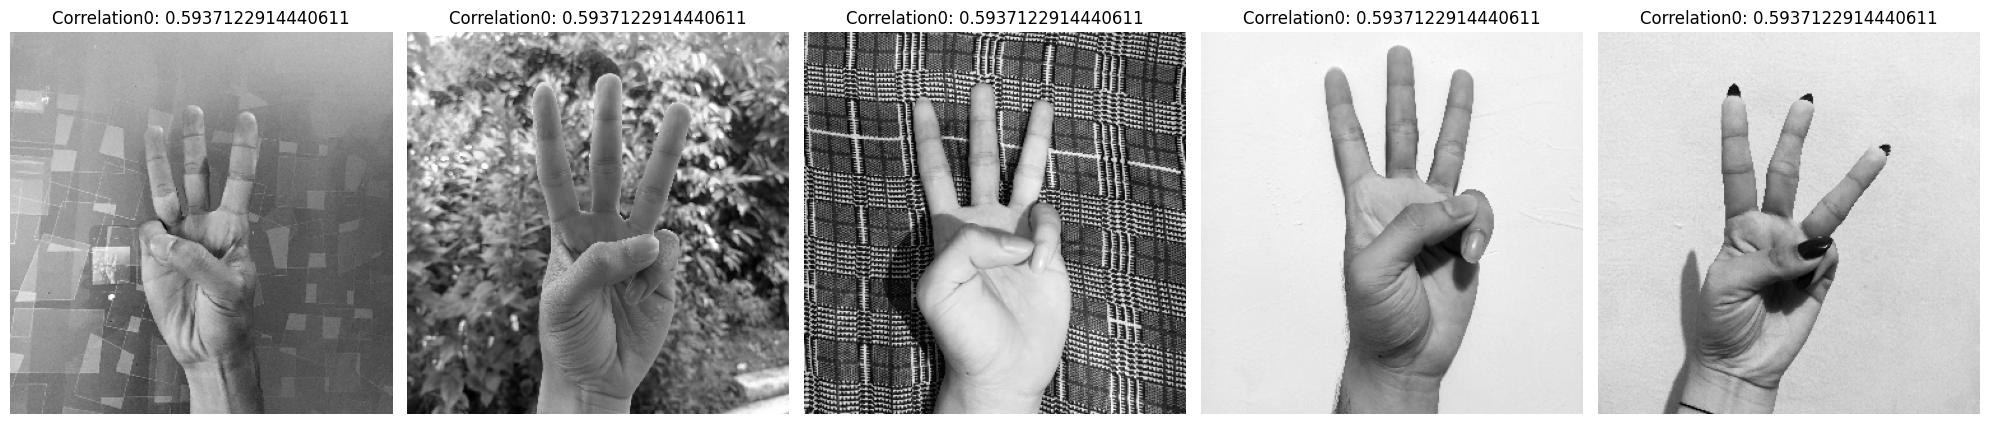

In [18]:
frame_0 = save_frame(hasil_0)
df_0 = pd.DataFrame(frame_0, columns=headerPass)
df_sorted_0 = df_0.sort_values(by=['Correlation0'], ascending=False)
top_5_results_0 = df_sorted_0[['path', 'Correlation0']].head(1)

for index, row in top_5_results_0.iterrows():
    filename = row['path']
    correlation0 = row['Correlation0']
    image_index = filenames.index(filename)
    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(hasil_0[image_index + i], cmap='gray')
        plt.title(f"Correlation0: {correlation0}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Code `df_0.to_csv('outputHasil0.csv',index=False)` di bawah ini digunakan untuk menyimpan data dari dataframe df_0 ke dalam file CSV bernama outputHasil0.csv. Parameter index=False memastikan bahwa baris indeks data tidak ikut disimpan dalam file CSV.

In [19]:
df_0.to_csv('outputHasil0.csv',index=False)
df_0

path      Kontras0  Dissimilarity0   Homogenitas0  \
0   01_F1D022016_1_3.jpg  3.789242e+07      1090709982  356614.580083   
1   01_F1D022044_1_1.jpg  1.314870e+08      1331333692  405032.153837   
2   01_F1D022044_1_2.jpg  3.733303e+08      1379714188  400184.393548   
3   01_F1D022044_1_3.jpg  1.199215e+08      1267793216  387503.249027   
4   01_F1D022069_1_1.jpg  2.240876e+08      1193066978  427065.866956   
..                   ...           ...             ...            ...   
70  01_f1d022149_5_1.jpg  9.425981e+07      1605776428  505954.804807   
71  01_f1d022149_5_2.jpg  1.128840e+08       978205197  323666.134715   
72  01_f1d022149_5_3.jpg  5.215291e+08       406311626  242747.998426   
73  01_F1D022154_5_1.jpg  3.316908e+08       980851324  358861.605794   
74  01_F1D022154_5_2.jpg  3.349989e+08      1075923330  375581.895567   

        Entropi0      ASM0   Energy0  Correlation0  
0  -7.523276e+07   8094098   8094098     -0.070761  
1  -9.381271e+07  10406179  10406179      0.240276  
2  -9.698139e+07  10168417  10168417      0.133170  
3  -8.918764e+07   9411192   9411192      0.230873  
4  -8.894365e+07   9300677   9300677      0.168094  
..           ...       ...       ...           ...  
70 -1.193222e+08   8641145   8641145      0.145842  
71 -6.963467e+07  10400772  10400772      0.036007  
72 -4.046897e+07  10089332  10089332      0.393924  
73 -7.294967e+07   9704575   9704575     -0.168976  
74 -7.915337e+07   9619020   9619020      0.211306  

[75 rows x 8 columns]

Code di bawah menghasilkan visualisasi lima gambar teratas berdasarkan nilai korelasi terbesar (`Correlation45`) dari hasil ekstraksi fitur untuk gambar-gambar yang telah dirotasi sebesar 45°. Pertama, hasil ekstraksi fitur disimpan dalam DataFrame `df_45` dengan kolom-kolom yang sesuai. DataFrame tersebut kemudian diurutkan berdasarkan nilai `Correlation45` secara menurun. Selanjutnya, lima gambar teratas beserta dengan nilai `Correlation45`-nya ditampilkan dalam sebuah subplot. Setiap gambar ditampilkan dengan judul yang menampilkan nilai `Correlation45` yang bersesuaian, memberikan gambaran visual tentang gambar-gambar dengan korelasi tertinggi.

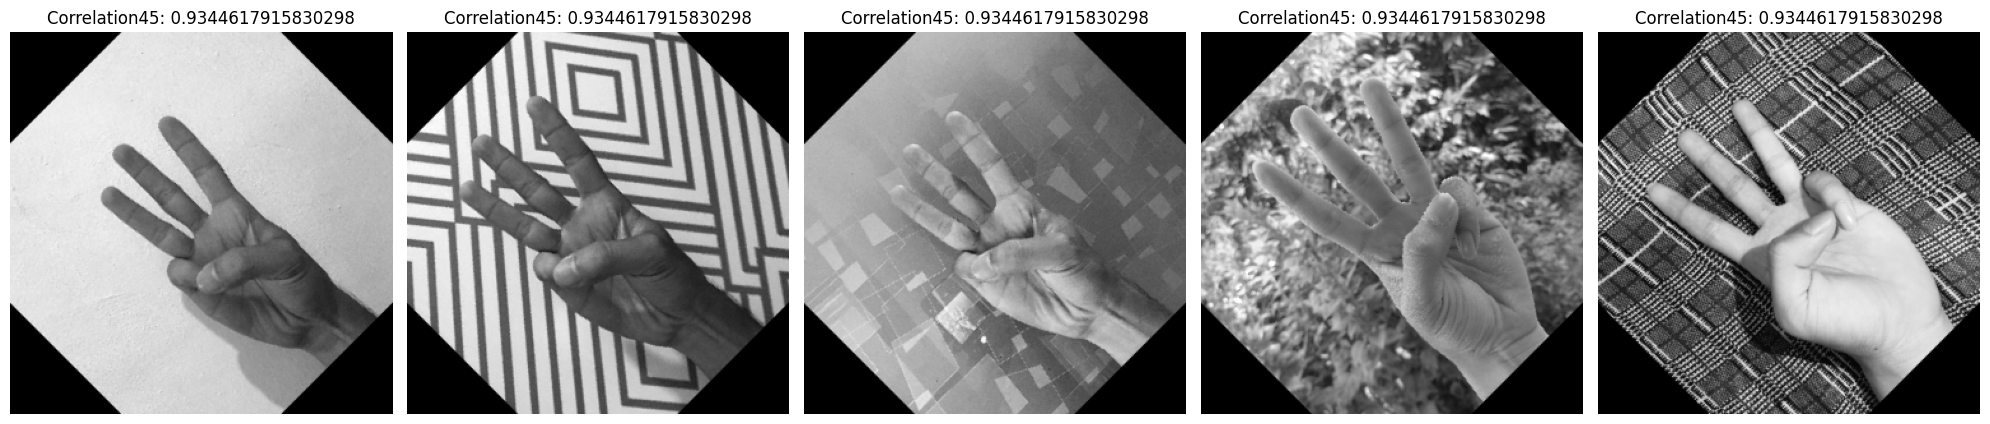

In [20]:
headerPass = ['path', 'Kontras45', 'Dissimilarity45', 'Homogenitas45', 'Entropi45', 'ASM45', 'Energy45', 'Correlation45']
frame_45 = save_frame(hasil_45)
df_45 = pd.DataFrame(frame_45, columns=headerPass)

df_sorted_45 = df_45.sort_values(by=['Correlation45'], ascending=False)
top_5_results_45 = df_sorted_45[['path', 'Correlation45']].head(1)

for index, row in top_5_results_45.iterrows():
    filename = row['path']
    correlation45 = row['Correlation45']
    image_index = filenames.index(filename)
    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(hasil_45[image_index + i], cmap='gray')
        plt.title(f"Correlation45: {correlation45}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Code `df_45.to_csv('outputHasil45.csv',index=False)` di bawah ini digunakan untuk menyimpan data dari dataframe df_45 ke dalam file CSV bernama outputHasil45.csv. Parameter index=False memastikan bahwa baris indeks data tidak ikut disimpan dalam file CSV.

In [21]:
df_45.to_csv('outputHasil45.csv',index=False)
df_45

path     Kontras45  Dissimilarity45  Homogenitas45  \
0   01_F1D022016_1_3.jpg  2.094813e+08        784774598  288554.168644   
1   01_F1D022044_1_1.jpg  3.783767e+08       1064294926  272284.852526   
2   01_F1D022044_1_2.jpg  5.650338e+08       1082949956  249514.143812   
3   01_F1D022044_1_3.jpg  3.294649e+08        928998403  327605.335914   
4   01_F1D022069_1_1.jpg  3.984556e+08        902209139  307174.686478   
..                   ...           ...              ...            ...   
70  01_f1d022149_5_1.jpg  4.712440e+08       1240767324  356814.846351   
71  01_f1d022149_5_2.jpg  2.714314e+08        733418027  288509.037594   
72  01_f1d022149_5_3.jpg  5.389381e+08        342547553  235459.597496   
73  01_F1D022154_5_1.jpg  4.348038e+08        709011041  312516.581000   
74  01_F1D022154_5_2.jpg  4.775851e+08        843569995  275629.150350   

       Entropi45    ASM45  Energy45  Correlation45  
0  -6.091527e+07  7002971   7002971       0.904372  
1  -7.647076e+07  9008314   9008314       0.882552  
2  -7.868387e+07  8368198   8368198       0.579719  
3  -7.256051e+07  7847138   7847138       0.825015  
4  -7.154897e+07  7718783   7718783       0.604662  
..           ...      ...       ...            ...  
70 -9.705671e+07  7255544   7255544       0.852088  
71 -5.983980e+07  8653720   8653720       0.679408  
72 -3.979368e+07  8363550   8363550       0.636162  
73 -5.933446e+07  8079020   8079020       0.509931  
74 -6.748316e+07  7961018   7961018       0.681940  

[75 rows x 8 columns]

Code di bawah menghasilkan visualisasi lima gambar teratas berdasarkan nilai korelasi terbesar (`Correlation90`) dari hasil ekstraksi fitur untuk gambar-gambar yang telah dirotasi sebesar 90°. Pertama, hasil ekstraksi fitur disimpan dalam DataFrame `df_90` dengan kolom-kolom yang sesuai. DataFrame tersebut kemudian diurutkan berdasarkan nilai `Correlation90` secara menurun. Selanjutnya, lima gambar teratas beserta dengan nilai `Correlation90`-nya ditampilkan dalam sebuah subplot. Setiap gambar ditampilkan dengan judul yang menampilkan nilai `Correlation90` yang bersesuaian, memberikan gambaran visual tentang gambar-gambar dengan korelasi tertinggi.

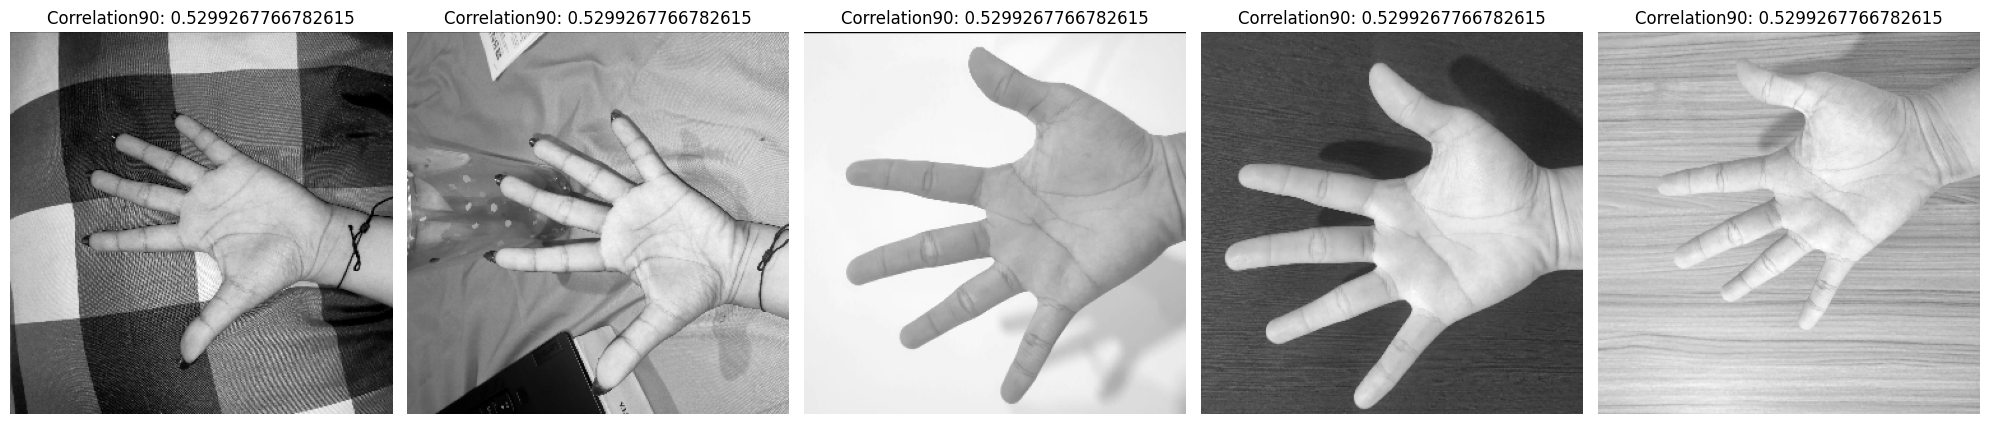

In [22]:
headerPass = ['path', 'Kontras90', 'Dissimilarity90', 'Homogenitas90', 'Entropi90', 'ASM90', 'Energy90', 'Correlation90']
frame_90 = save_frame(hasil_90)
df_90 = pd.DataFrame(frame_90, columns=headerPass)

df_sorted_90 = df_90.sort_values(by=['Correlation90'], ascending=False)
top_5_results_90 = df_sorted_90[['path', 'Correlation90']].head(1)

for index, row in top_5_results_90.iterrows():
    filename = row['path']
    correlation90 = row['Correlation90']
    image_index = filenames.index(filename)
    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(hasil_90[image_index + i], cmap='gray')
        plt.title(f"Correlation90: {correlation90}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Code `df_90.to_csv('outputHasil90.csv',index=False)` di bawah ini digunakan untuk menyimpan data dari dataframe df_90 ke dalam file CSV bernama outputHasil90.csv. Parameter index=False memastikan bahwa baris indeks data tidak ikut disimpan dalam file CSV.

In [23]:
df_90.to_csv('outputHasil90.csv',index=False)
df_90

path     Kontras90  Dissimilarity90  Homogenitas90  \
0   01_F1D022016_1_3.jpg  4.217650e+07       1103958824  342163.931907   
1   01_F1D022044_1_1.jpg  1.375556e+08       1338914537  389111.454000   
2   01_F1D022044_1_2.jpg  3.785964e+08       1346750204  406071.789840   
3   01_F1D022044_1_3.jpg  1.251023e+08       1263576555  392192.095300   
4   01_F1D022069_1_1.jpg  2.288295e+08       1291766522  390154.282772   
..                   ...           ...              ...            ...   
70  01_f1d022149_5_1.jpg  1.035278e+08       1629391405  492004.273741   
71  01_f1d022149_5_2.jpg  1.165696e+08        968184839  330380.354020   
72  01_f1d022149_5_3.jpg  5.218227e+08        478972432  190587.241259   
73  01_F1D022154_5_1.jpg  3.344600e+08       1051852208  329901.786586   
74  01_F1D022154_5_2.jpg  3.393169e+08       1095600379  348393.372514   

       Entropi90     ASM90  Energy90  Correlation90  
0  -7.500223e+07   8067891   8067891      -0.109689  
1  -9.346352e+07  10372157  10372157      -0.072476  
2  -9.660906e+07  10133753  10133753      -0.032476  
3  -8.881309e+07   9378842   9378842      -0.191445  
4  -8.865393e+07   9271621   9271621      -0.036372  
..           ...       ...       ...            ...  
70 -1.188821e+08   8616398   8616398       0.006374  
71 -6.942900e+07  10366346  10366346       0.079338  
72 -4.046151e+07  10068340  10068340       0.405671  
73 -7.280685e+07   9676949   9676949       0.009991  
74 -7.887917e+07   9590226   9590226      -0.070655  

[75 rows x 8 columns]

Code di bawah menghasilkan visualisasi lima gambar teratas berdasarkan nilai korelasi terbesar (`Correlation135`) dari hasil ekstraksi fitur untuk gambar-gambar yang telah dirotasi sebesar 135°. Pertama, hasil ekstraksi fitur disimpan dalam DataFrame `df_135` dengan kolom-kolom yang sesuai. DataFrame tersebut kemudian diurutkan berdasarkan nilai `Correlation135` secara menurun. Selanjutnya, lima gambar teratas beserta dengan nilai `Correlation135`-nya ditampilkan dalam sebuah subplot. Setiap gambar ditampilkan dengan judul yang menampilkan nilai `Correlation135` yang bersesuaian, memberikan gambaran visual tentang gambar-gambar dengan korelasi tertinggi.

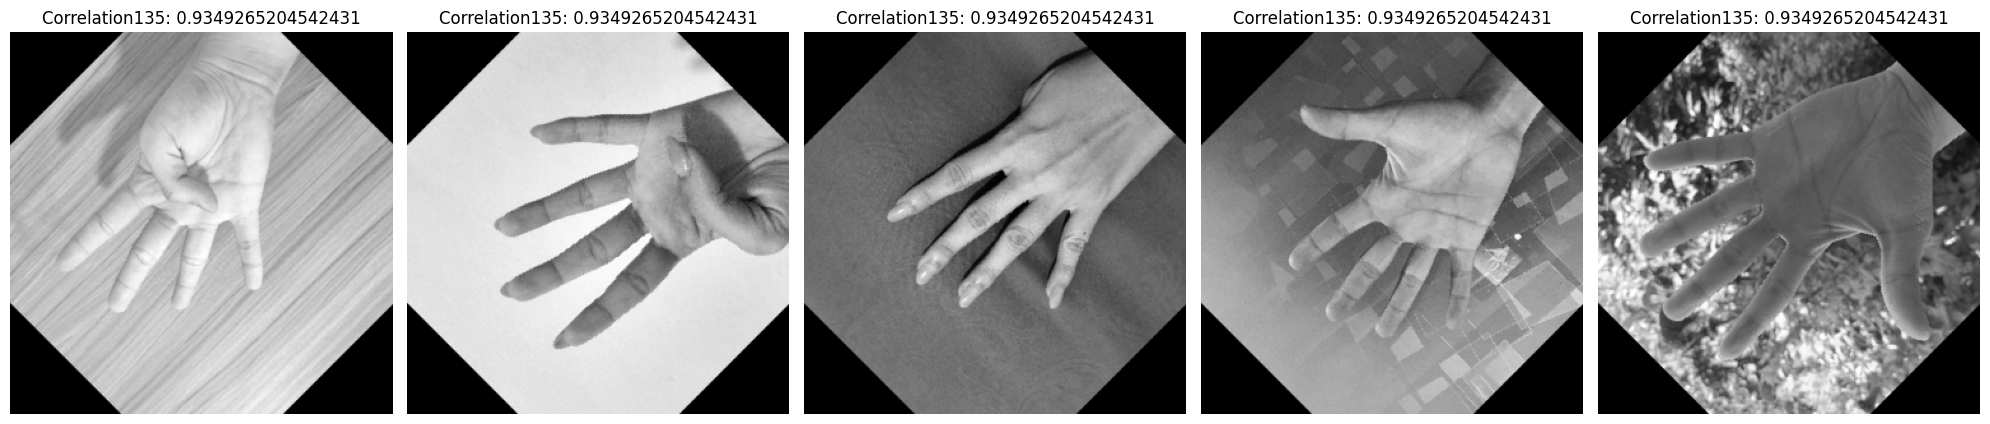

In [24]:
headerPass = ['path', 'Kontras135', 'Dissimilarity135', 'Homogenitas135', 'Entropi135', 'ASM135', 'Energy135', 'Correlation135']
frame_135 = save_frame(hasil_135)
df_135 = pd.DataFrame(frame_135, columns=headerPass)

df_sorted_135 = df_135.sort_values(by=['Correlation135'], ascending=False)
top_5_results_135 = df_sorted_135[['path', 'Correlation135']].head(1)

for index, row in top_5_results_135.iterrows():
    filename = row['path']
    correlation135 = row['Correlation135']
    image_index = filenames.index(filename)
    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(hasil_135[image_index + i], cmap='gray')
        plt.title(f"Correlation135: {correlation135}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Code `df_135.to_csv('outputHasil135.csv',index=False)` di bawah ini digunakan untuk menyimpan data dari dataframe df_135 ke dalam file CSV bernama outputHasil135.csv. Parameter index=False memastikan bahwa baris indeks data tidak ikut disimpan dalam file CSV.

In [25]:
df_135.to_csv('outputHasil135.csv',index=False)
df_135

path    Kontras135  Dissimilarity135  Homogenitas135  \
0   01_F1D022016_1_3.jpg  2.095723e+08         857276658   250533.213887   
1   01_F1D022044_1_1.jpg  3.780615e+08         980509149   312031.831565   
2   01_F1D022044_1_2.jpg  5.644419e+08         998238349   314112.764679   
3   01_F1D022044_1_3.jpg  3.289514e+08         971522228   287521.640180   
4   01_F1D022069_1_1.jpg  3.981737e+08         953723561   289158.081382   
..                   ...           ...               ...             ...   
70  01_f1d022149_5_1.jpg  4.712321e+08        1209518460   383779.973957   
71  01_f1d022149_5_2.jpg  2.714381e+08         807097954   249395.748688   
72  01_f1d022149_5_3.jpg  5.389428e+08         467890056   192454.823416   
73  01_F1D022154_5_1.jpg  4.351881e+08         820745631   217362.910666   
74  01_F1D022154_5_2.jpg  4.775716e+08         896992822   229208.582569   

      Entropi135   ASM135  Energy135  Correlation135  
0  -6.091671e+07  7012500    7012500        0.886836  
1  -7.642770e+07  9004264    9004264        0.667349  
2  -7.860187e+07  8368672    8368672        0.415853  
3  -7.248027e+07  7844123    7844123        0.638270  
4  -7.149753e+07  7717297    7717297        0.546787  
..           ...      ...        ...             ...  
70 -9.704616e+07  7255881    7255881        0.816198  
71 -5.980412e+07  8655200    8655200        0.713597  
72 -3.979323e+07  8369905    8369905        0.394406  
73 -5.939941e+07  8077144    8077144        0.423067  
74 -6.742188e+07  7963308    7963308        0.361052  

[75 rows x 8 columns]

Code di bawah ini menggunakan library Pandas untuk memuat dan memanipulasi data dari file CSV bernama `validation.csv`. Baris pertama, `datus = pd.read_csv('validation.csv')`, memuat file CSV ke dalam DataFrame Pandas yang diberi nama `datus`. DataFrame ini pada dasarnya mewakili struktur data berbentuk tabel, di mana setiap baris sesuai dengan catatan data dan setiap kolom mewakili atribut atau fitur. Baris kedua, `datus.iloc[:, :].head()`, mengekstrak dan menampilkan beberapa baris pertama dari DataFrame "datus". Metode pengindeksan iloc digunakan untuk memilih semua baris dan semua kolom ditandai dengan `:` dari DataFrame. Metode `.head()` kemudian membatasi output ke jumlah baris tertentu, yang tidak ditentukan secara eksplisit dalam kode yang diberikan. Ini efektif menampilkan pratinjau data yang terdapat dalam file `validation.csv`.

In [26]:
datus = pd.read_csv('validation.csv')
datus.iloc[:, :].head()

contrast_0  contrast_45  contrast_90  contrast_135  dissimilarity_0  \
0  1768.320952  1930.804999  1137.489905   1365.584606        23.408952   
1  1812.106476   962.718707  1484.389905   2024.235469        21.899238   
2  3105.920381  2531.586193  1792.079048   3266.372942        31.926476   
3  3368.077524  3385.628050  2257.855238   3732.729022        34.036000   
4  1494.007619  1901.003769  1564.364952   1991.394366        18.807619   

   dissimilarity_45  dissimilarity_90  dissimilarity_135  homogeneity_0  \
0         26.309066         17.052571          19.286253       0.358650   
1         13.042055         17.873333          24.230708       0.553610   
2         28.332077         21.813905          34.587582       0.291026   
3         35.312636         25.453714          38.123587       0.383712   
4         24.932751         20.617524          24.786947       0.459871   

   homogeneity_45  ...  correlation_90  correlation_135     asm_0  entropy_0  \
0        0.291555  ...        0.677119         0.604250  0.063717   7.732198   
1        0.616566  ...        0.535699         0.373513  0.273481   5.519998   
2        0.305981  ...        0.725098         0.487873  0.060900   8.801246   
3        0.381870  ...        0.644318         0.414587  0.128828   7.933115   
4        0.437812  ...        0.746622         0.677922  0.170954   7.475274   

     asm_45  entropy_45    asm_90  entropy_90   asm_135  entropy_135  
0  0.050296    8.081334  0.088581    7.687207  0.070051     7.888678  
1  0.323768    5.276858  0.315946    5.237368  0.259917     5.575754  
2  0.069178    8.836806  0.099234    8.447755  0.056196     8.908830  
3  0.134717    8.002267  0.177535    7.614807  0.119482     8.071418  
4  0.178092    7.519773  0.222201    7.048745  0.176254     7.528260  

[5 rows x 28 columns]

### Features Selection

### Splitting Data

### Normalization

## Modeling

## Evaluation